# Importing Libraries

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
from random import randint
#from keras.models import Sequential
from tensorflow.keras.models import Model
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Input
from sklearn.metrics import confusion_matrix
import numpy as np
from keras.preprocessing import image

# Sample Data

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[29 28 28 ... 29 29 30]
 [28 28 28 ... 29 29 29]
 [28 28 28 ... 29 29 29]
 ...
 [18 18 18 ... 14 15 15]
 [16 16 17 ... 14 15 16]
 [15 15 16 ... 15 16 16]]


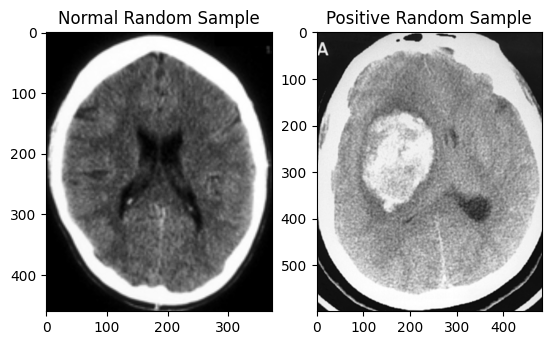

In [ ]:
# read random normal and positive images
def random_image():
  positive_train_path = '/content/drive/MyDrive/dataset/head_ct/train/hemorrhage_train'
  normal_train_path = '/content/drive/MyDrive/dataset/head_ct/train/norm_train'

  rand_int_normal = randint(100, 190)
  rand_int_positive = "%03d" % randint(0, 90)

  normal_sample_image = cv2.imread(normal_train_path+'/'+str(rand_int_normal)+'.png', cv2.IMREAD_GRAYSCALE)
  plt.subplot(1,2,1)
  print(normal_sample_image)
  plt.imshow(normal_sample_image, cmap = 'gray')
  plt.title("Normal Random Sample")

  positive_sample_image = cv2.imread(positive_train_path+'/'+str(rand_int_positive)+'.png', cv2.IMREAD_GRAYSCALE)
  plt.subplot(1,2,2)
  print(positive_sample_image)
  plt.imshow(positive_sample_image, cmap = 'gray')
  plt.title("Positive Random Sample")

random_image()


# Data Preprocessing

## Train data

In [ ]:
# train data preprocessing
train_gen = ImageDataGenerator(rescale = 1./255,
                               shear_range=0.2,
                               zoom_range = 0.2,
                               horizontal_flip= True)

train_set = train_gen.flow_from_directory('/content/drive/MyDrive/dataset/head_ct/train',
                                          target_size = (100, 100),
                                          batch_size = 50,
                                          class_mode= 'binary')

# test data preprocessing
test_gen = ImageDataGenerator(rescale = 1./255)
test_set = test_gen.flow_from_directory('/content/drive/MyDrive/dataset/head_ct/test',
                                        target_size= (100,100),
                                        batch_size = 50,
                                        class_mode= 'binary')

Found 180 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


# Building CNN model

In [ ]:
# initialize cnn
#classifier = Model()
inputs = Input(shape=(100, 100, 3))


# 1.convolutional layer
layers = Conv2D(filters=50, kernel_size =3, activation = 'relu', input_shape = [100, 100, 3])(inputs) # note: grayscale images
layers = Conv2D(filters=50, kernel_size =3, activation = 'relu', input_shape = [100, 100, 3])(layers) # note: grayscale images

# 2.pooling layer
layers = MaxPooling2D(pool_size = 2, strides=2)(layers)

# 3. convolutional layer
layers = Conv2D(filters = 50, kernel_size = 3 , activation = 'relu')(layers)
layers = Conv2D(filters = 50, kernel_size = 3 , activation = 'relu')(layers)

# 4. pooling layer
layers = MaxPooling2D(pool_size = 2, strides=2)(layers)

# 5. flatten layer
layers = Flatten()(layers)

# 6. full connection
layers = Dense(units = 200 , activation  = 'relu')(layers)

# 7. output layer
outputs = Dense(units = 1, activation = 'sigmoid')(layers)

# model
model = Model(inputs=inputs, outputs=outputs)

# Compile CNN model

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train CNN model

In [ ]:
history = model.fit(x = train_set , validation_data = test_set, epochs = 100)

Epoch 1/100
4/4 [==============================] - 126s 40s/step - loss: 0.9154 - accuracy: 0.4611 - val_loss: 0.6777 - val_accuracy: 0.5500
Epoch 2/100
4/4 [==============================] - 2s 606ms/step - loss: 0.6825 - accuracy: 0.5500 - val_loss: 0.7791 - val_accuracy: 0.3000
Epoch 3/100
4/4 [==============================] - 2s 623ms/step - loss: 0.6607 - accuracy: 0.6000 - val_loss: 0.7156 - val_accuracy: 0.6000
Epoch 4/100
4/4 [==============================] - 3s 736ms/step - loss: 0.6070 - accuracy: 0.7056 - val_loss: 0.8842 - val_accuracy: 0.2500
Epoch 5/100
4/4 [==============================] - 2s 522ms/step - loss: 0.5368 - accuracy: 0.7667 - val_loss: 1.1291 - val_accuracy: 0.5500
Epoch 6/100
4/4 [==============================] - 2s 527ms/step - loss: 0.4877 - accuracy: 0.8111 - val_loss: 1.3569 - val_accuracy: 0.5500
Epoch 7/100
4/4 [==============================] - 2s 526ms/step - loss: 0.5457 - accuracy: 0.7500 - val_loss: 0.8815 - val_accuracy: 0.3500
Epoch 8/100
4

# Model Summary

In [ ]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 98, 98, 50)        1400      
                                                                 
 conv2d_9 (Conv2D)           (None, 96, 96, 50)        22550     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 48, 48, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 50)        22550     
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 50)        22550     
                                                           

# Accuracy Graph

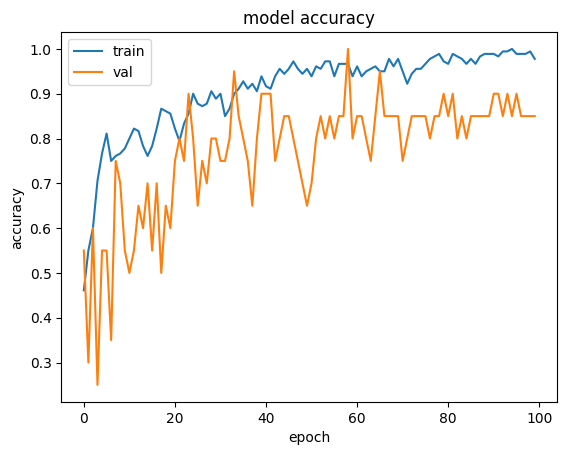

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Loss Graph

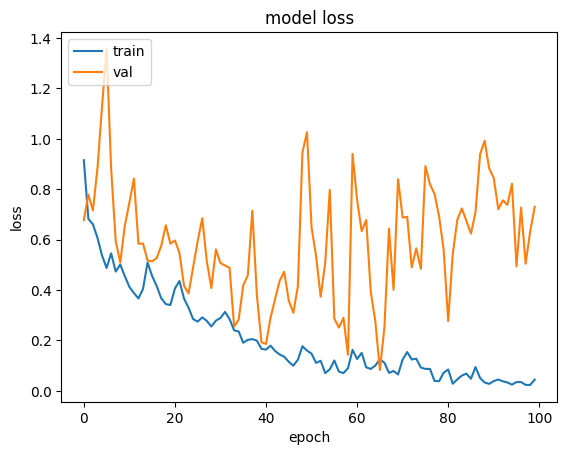

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Prediction

In [ ]:
test_case = image.load_img('/content/test_case.jpg', target_size = (100, 100))
test_case = image.img_to_array(test_case)
test_case = np.expand_dims(test_case, axis = 0)
result = model.predict(test_case)
print(train_set.class_indices, result)
if result[0][0] == 0:
  print("Hemorrhage")
else:
  print("Normal")

1/1 [==============================] - 0s 418ms/step
{'hemorrhage_train': 0, 'norm_train': 1} [[0.]]
Hemorrhage


# Save Model

In [29]:
tf.saved_model.save(model, "./content/temp_models/CNN_tmp_model")
print("Model has been saved")

Model has been saved


In [31]:
!pip install tf2onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.8/455.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 83.7 MB/s eta 0:00:00


In [32]:
!python3 -m tf2onnx.convert --saved-model /content/content/temp_models/CNN_tmp_model --output "./output_models/CNN_model.onnx"

2024-04-13 22:41:03.059410: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-13 22:41:03.059475: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-13 22:41:03.060921: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-13 22:41:04.529206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2